# TelecomX LATAM parte 2

A partir de este punto es la parte 2 del challenge utilizando los datos de TelecomX.

## Preparacion de los datos

### Extraccion de datos


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('TelecomX.csv')
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,65.60,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.90,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.90,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.00,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,55.15,742.90,1.838333
7252,1.0,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,85.10,1873.70,2.836667
7253,0.0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,50.30,92.75,1.676667
7254,0.0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,67.85,4627.65,2.261667


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   int64  
 4   Dependents        7256 non-null   int64  
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   int64  
 7   MultipleLines     7256 non-null   int64  
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   int64  
 10  OnlineBackup      7256 non-null   int64  
 11  DeviceProtection  7256 non-null   int64  
 12  TechSupport       7256 non-null   int64  
 13  StreamingTV       7256 non-null   int64  
 14  StreamingMovies   7256 non-null   int64  
 15  Contract          7256 non-null   object 
 16  Charges.Monthly   7256 non-null   float64


### Eliminación de Columnas Irrelevantes

In [248]:
df = df.drop(['gender', 'Partner', 'Dependents'], axis=1)
df.head()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,DSL,0,1,0,1,1,0,One year,65.6,593.30,2.186667
1,0.0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.9,542.40,1.996667
2,1.0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.9,280.85,2.463333
3,1.0,1,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.0,1237.85,3.266667
4,1.0,1,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.9,267.40,2.796667


### Encoding

In [249]:
print(df['InternetService'].unique())
print(df['Contract'].unique())

['DSL' 'Fiber optic' '0']
['One year' 'Month-to-month' 'Two year']


In [250]:
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,DSL,0,1,0,1,1,0,1,65.60,593.30,2.186667
1,0.0,0,9,1,1,DSL,0,0,0,0,0,1,0,59.90,542.40,1.996667
2,1.0,0,4,1,0,Fiber optic,0,0,1,0,0,0,0,73.90,280.85,2.463333
3,1.0,1,13,1,0,Fiber optic,0,1,1,0,1,1,0,98.00,1237.85,3.266667
4,1.0,1,3,1,0,Fiber optic,0,0,0,1,1,0,0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0,13,1,0,DSL,1,0,0,1,0,0,1,55.15,742.90,1.838333
7252,1.0,0,22,1,1,Fiber optic,0,0,0,0,0,1,0,85.10,1873.70,2.836667
7253,0.0,0,2,1,0,DSL,0,1,0,0,0,0,0,50.30,92.75,1.676667
7254,0.0,0,67,1,0,DSL,1,0,1,1,0,1,2,67.85,4627.65,2.261667


In [251]:
df['InternetService'] = df['InternetService'].map({'0': 0, 'DSL': 1, 'Fiber optic': 2})
df

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,1,0,1,0,1,1,0,1,65.60,593.30,2.186667
1,0.0,0,9,1,1,1,0,0,0,0,0,1,0,59.90,542.40,1.996667
2,1.0,0,4,1,0,2,0,0,1,0,0,0,0,73.90,280.85,2.463333
3,1.0,1,13,1,0,2,0,1,1,0,1,1,0,98.00,1237.85,3.266667
4,1.0,1,3,1,0,2,0,0,0,1,1,0,0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0,13,1,0,1,1,0,0,1,0,0,1,55.15,742.90,1.838333
7252,1.0,0,22,1,1,2,0,0,0,0,0,1,0,85.10,1873.70,2.836667
7253,0.0,0,2,1,0,1,0,1,0,0,0,0,0,50.30,92.75,1.676667
7254,0.0,0,67,1,0,1,1,0,1,1,0,1,2,67.85,4627.65,2.261667


Se realizo label encoding para las columnas de InternetService y Contract, ya que estas tenian mas de dos valores unicos por lo que no se podia hacer one hot encoding.

### Verificación de la Proporción de Cancelación (Churn)

In [252]:
df = df.dropna(subset=['Churn'])
df.reset_index(drop=True, inplace=True)
df['Churn'] = df['Churn'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   int64  
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   int64  
 13  Charges.Monthly   7032 non-null   float64
 14  Charges.Total     7032 non-null   float64
 15  Cuentas_Diarias   7032 non-null   float64
dtypes: float64(3), int64(13)
memory usage: 879

/tmp/ipython-input-635223859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(int)


In [253]:
df['Churn'].unique()

array([0, 1])

In [254]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


### Balanceo de Clases (opcional)

In [255]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y_res.value_counts()

,count
Churn,
0,5163
1,5163


In [256]:
X_res

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,9,1,0,1,0,1,0,1,1,0,1,65.600000,593.300000,2.186667
1,0,9,1,1,1,0,0,0,0,0,1,0,59.900000,542.400000,1.996667
2,0,4,1,0,2,0,0,1,0,0,0,0,73.900000,280.850000,2.463333
3,1,13,1,0,2,0,1,1,0,1,1,0,98.000000,1237.850000,3.266667
4,1,3,1,0,2,0,0,0,1,1,0,0,83.900000,267.400000,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,4,1,1,2,0,0,0,0,0,0,0,80.301883,331.941284,2.676729
10322,0,3,1,0,2,0,0,0,0,1,1,0,98.984832,310.262221,3.299494
10323,0,48,1,1,2,0,0,0,0,1,1,0,96.820640,4780.292431,3.227355
10324,0,17,1,0,2,0,0,0,0,0,0,0,80.137352,1423.756778,2.671245


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   int64  
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   int64  
 13  Charges.Monthly   7032 non-null   float64
 14  Charges.Total     7032 non-null   float64
 15  Cuentas_Diarias   7032 non-null   float64
dtypes: float64(3), int64(13)
memory usage: 879

### Normalización o Estandarización (si es necesario)

In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,-0.397998,-0.779451,0.338404,-0.792262,-0.458313,-0.511445,1.615701,-0.613990,1.935305,1.340187,-0.752151,0.673292,-0.085144,-0.665749,-0.085144
1,-0.397998,-0.779451,0.338404,1.262208,-0.458313,-0.511445,-0.618926,-0.613990,-0.516714,-0.746165,1.329520,-0.641212,-0.283775,-0.689022,-0.283775
2,-0.397998,-0.987978,0.338404,-0.792262,0.876677,-0.511445,-0.618926,1.628691,-0.516714,-0.746165,-0.752151,-0.641212,0.204090,-0.808607,0.204090
3,2.512575,-0.612629,0.338404,-0.792262,0.876677,-0.511445,1.615701,1.628691,-0.516714,1.340187,1.329520,-0.641212,1.043913,-0.371051,1.043913
4,2.512575,-1.029684,0.338404,-0.792262,0.876677,-0.511445,-0.618926,-0.613990,1.935305,1.340187,-0.752151,-0.641212,0.552564,-0.814756,0.552564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.397998,-0.987978,0.338404,1.262208,0.876677,-0.511445,-0.618926,-0.613990,-0.516714,-0.746165,-0.752151,-0.641212,0.427179,-0.785247,0.427179
10322,-0.397998,-1.029684,0.338404,-0.792262,0.876677,-0.511445,-0.618926,-0.613990,-0.516714,1.340187,1.329520,-0.641212,1.078232,-0.795159,1.078232
10323,-0.397998,0.847062,0.338404,1.262208,0.876677,-0.511445,-0.618926,-0.613990,-0.516714,1.340187,1.329520,-0.641212,1.002815,1.248612,1.002815
10324,-0.397998,-0.445807,0.338404,-0.792262,0.876677,-0.511445,-0.618926,-0.613990,-0.516714,-0.746165,-0.752151,-0.641212,0.421445,-0.286051,0.421445


In [259]:
data_scaled = pd.concat([y_res, X_scaled], axis=1)
data_scaled.head()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,-0.397998,-0.779451,0.338404,-0.792262,-0.458313,-0.511445,1.615701,-0.613990,1.935305,1.340187,-0.752151,0.673292,-0.085144,-0.665749,-0.085144
1,0,-0.397998,-0.779451,0.338404,1.262208,-0.458313,-0.511445,-0.618926,-0.613990,-0.516714,-0.746165,1.329520,-0.641212,-0.283775,-0.689022,-0.283775
2,1,-0.397998,-0.987978,0.338404,-0.792262,0.876677,-0.511445,-0.618926,1.628691,-0.516714,-0.746165,-0.752151,-0.641212,0.204090,-0.808607,0.204090
3,1,2.512575,-0.612629,0.338404,-0.792262,0.876677,-0.511445,1.615701,1.628691,-0.516714,1.340187,1.329520,-0.641212,1.043913,-0.371051,1.043913
4,1,2.512575,-1.029684,0.338404,-0.792262,0.876677,-0.511445,-0.618926,-0.613990,1.935305,1.340187,-0.752151,-0.641212,0.552564,-0.814756,0.552564


## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

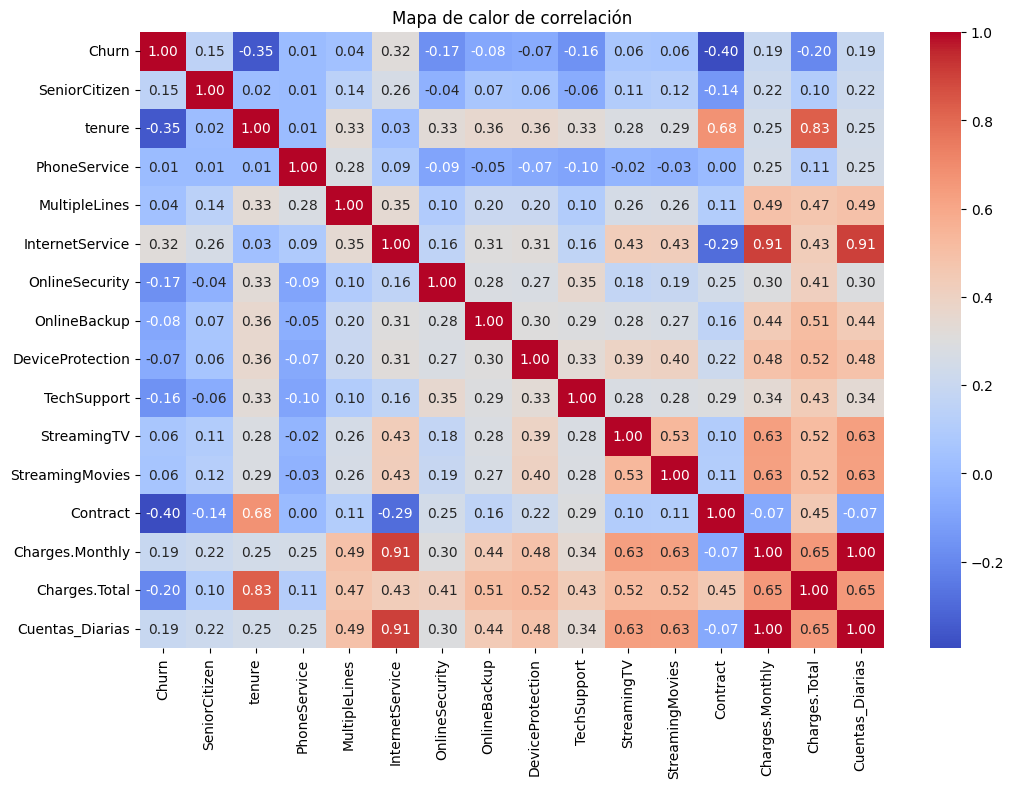

In [260]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

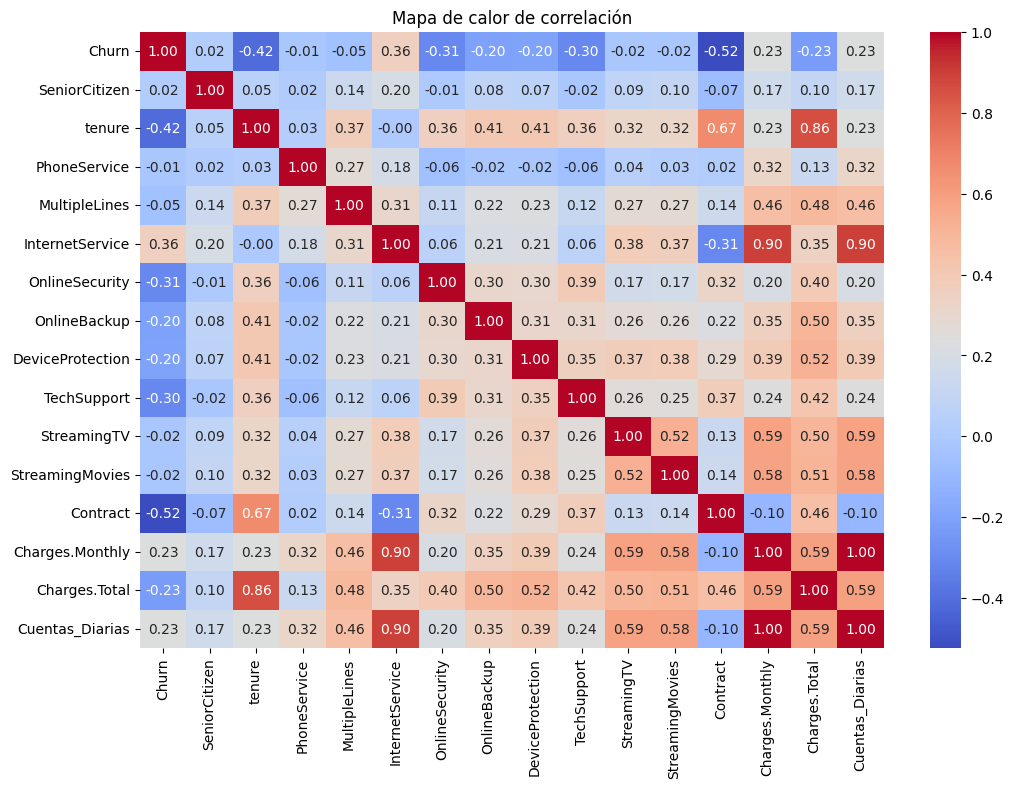

In [261]:
plt.figure(figsize=(12,8))
corr = data_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

del analisis de correlacion podemos observar que las siguientes son las caracteristicas con mas importancia para el modelo predictivo usando el dataframe inicial como base:
  #-Contract
  #-tenure
  #-InternetService
  #-Charges.Total
  #-Charges.Monthly
  #-Cuentas_Diarias
  #-SeniorCitizen

Usando datos escalados, balanceados y estandarizados, se muestra que el nuevo orden de importancia de las caracteristicas es:
  #-Contract (0.52)
  #-tenure (0.42)
  #-InternetService (0.36)
  #-OnlineSecurity (0.31)
  #-TechSupport (0.30)
  #-Charges.Total (0.23)
  #-Cuentas_Diarias (0.23)
  #-Charges.Monthly (0.23)
  #-OnlineBackup (0.20)
  #-DeviceProtection (0.20)

### Análisis Dirigido

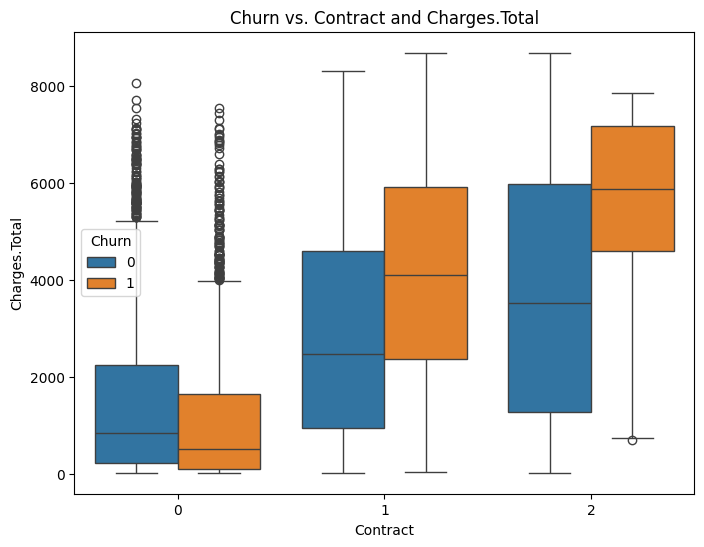

In [262]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='Charges.Total', hue='Churn', data=df)
plt.title('Churn vs. Contract and Charges.Total')
plt.show()

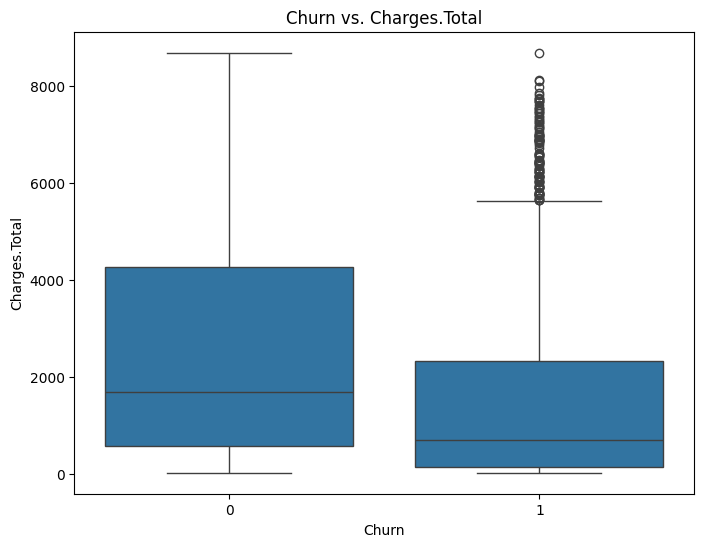

In [263]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Churn vs. Charges.Total')
plt.show()

## 🤖 Modelado Predictivo

### Separación de Datos

In [264]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

### Creación de Modelos

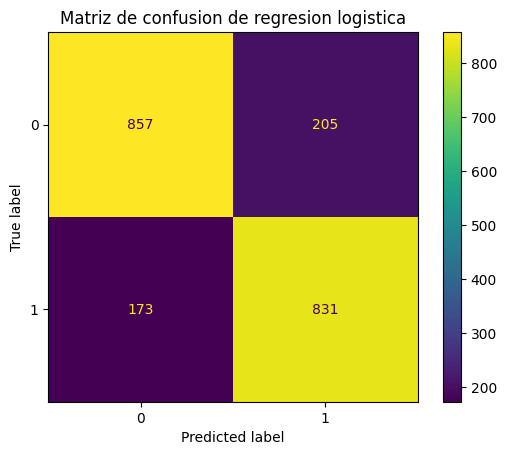

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Modelo 1: regresion logistica
# se usaron los datos escalados y previamente segmentados
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

y_pred_lr = log_reg_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot()
plt.title('Matriz de confusion de regresion logistica')
plt.show()

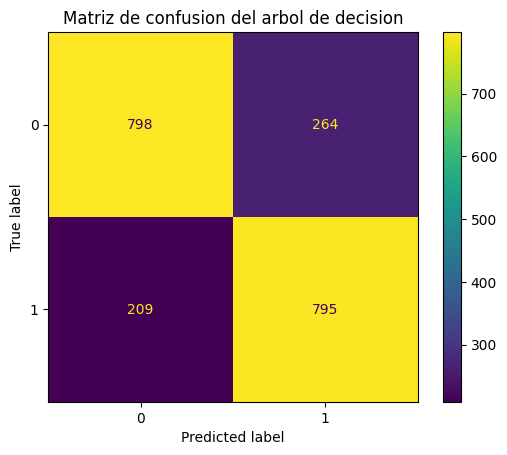

In [266]:
# Modelo 2: arbol de decision
# se usaron los datos solamente balanceados ya que no se necesita estar estandarizados para este modelo
# por lo que se volvieron a separar los datos para el entrenamiento
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

y_pred_dt = dt_model.predict(X_test_dt)
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot()
plt.title('Matriz de confusion del arbol de decision')
plt.show()

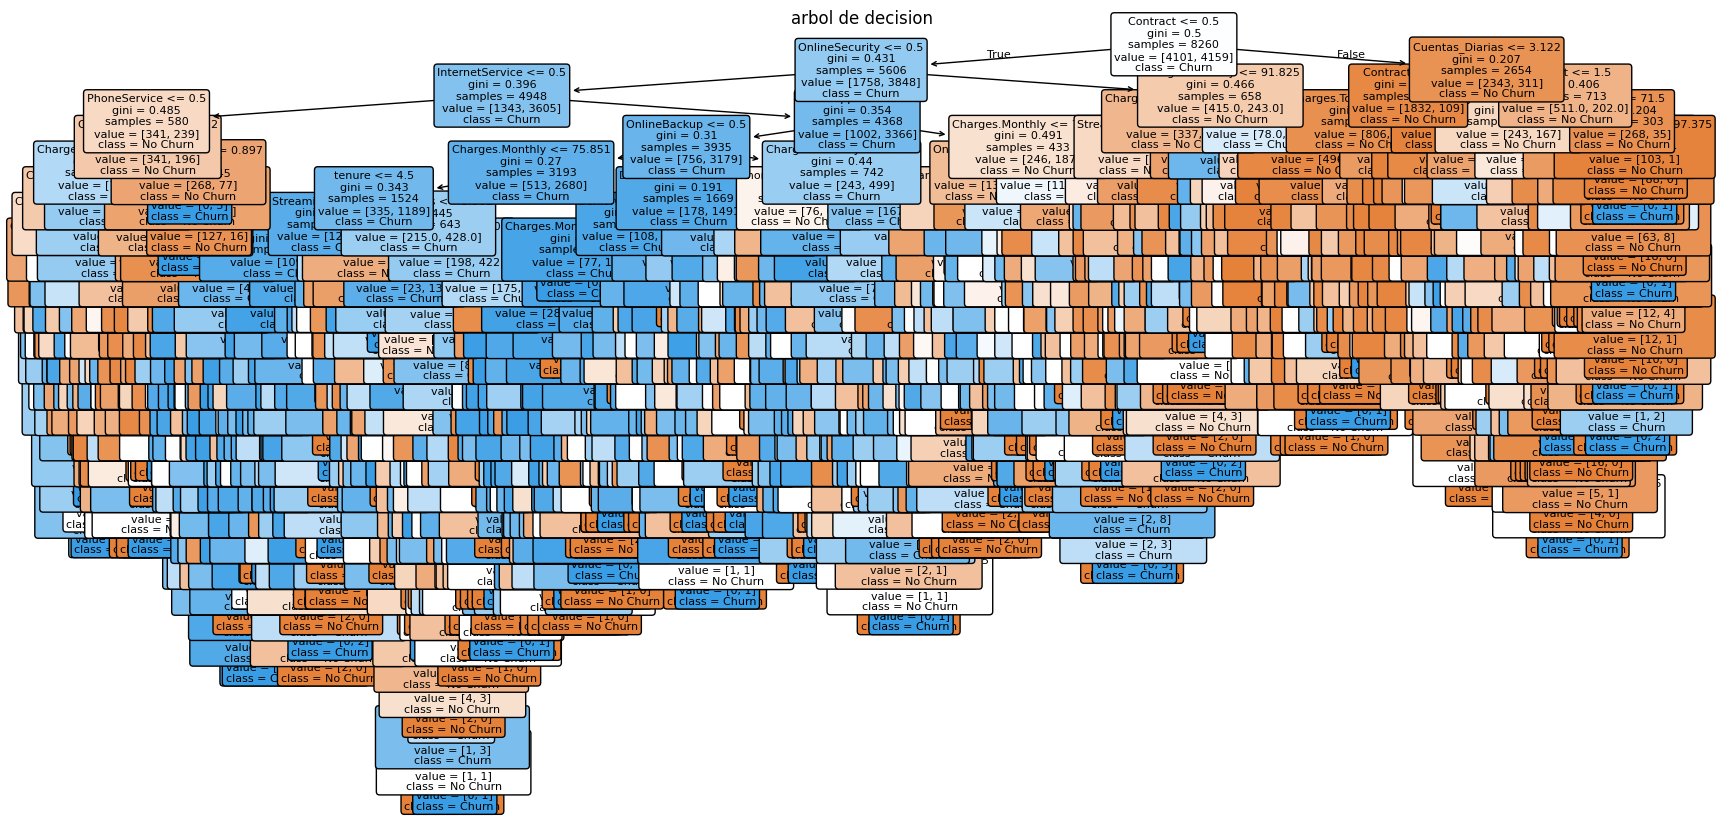

In [267]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=8)
plt.title('arbol de decision')
plt.show()

### Evaluación de los Modelos

In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# regresion logistica
print("Evaluacion modelo de regresion logistica:")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

print("\n" + "="*50 + "\n")

# arbol de decision
print("Evaluacion modelo de arbol de decision:")
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt)
recall_dt = recall_score(y_test_dt, y_pred_dt)
f1_dt = f1_score(y_test_dt, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

Evaluacion modelo de regresion logistica:
Accuracy: 0.8170
Precision: 0.8021
Recall: 0.8277
F1-score: 0.8147


Evaluacion modelo de arbol de decision:
Accuracy: 0.7711
Precision: 0.7507
Recall: 0.7918
F1-score: 0.7707


## Comparativa de modelos

### Mejor desempeño
El **modelo de regresión logística** obtuvo mejores resultados en todas las métricas:

| Métrica   | Regresión Logística | Árbol de Decisión |
|-----------|--------------------|-------------------|
| Accuracy  | 0.8170              | 0.7711            |
| Precision | 0.8021              | 0.7507            |
| Recall    | 0.8277              | 0.7918            |
| F1-score  | 0.8147              | 0.7707            |

**Conclusión**: La **regresión logística** fue el modelo con mejor desempeño general.

---

### Overfitting o Underfitting
- **Regresión logística**: Métricas altas y balanceadas → **sin indicios claros** de overfitting ni underfitting.
- **Árbol de decisión**: Métricas algo más bajas y tendencia a menor generalización → **posible overfitting** debido a la naturaleza del modelo, que tiende a memorizar patrones si no se limita su complejidad.

---

### Posibles causas y ajustes

#### Si hay overfitting (en árbol de decisión):
- Reducir la complejidad del árbol (`max_depth` más bajo).
- Aumentar `min_samples_leaf` para evitar divisiones con pocos datos.
- Probar modelos de ensamble como **Random Forest** o **Gradient Boosting**.

#### Si hubiera underfitting (no es el caso aquí):
- Aumentar la complejidad del modelo (profundidad del árbol o más variables).
- Incluir nuevas características relevantes.

---


## 📋 Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

In [272]:
# caracteristicas de importancia en regresion logistica
print("caracteristicas de importancia en regresion logistica:")
coeficientes = pd.DataFrame({'caracteristica': X_train.columns, 'coeficiente': log_reg_model.coef_[0]})
coeficientes['abs_coeficiente'] = abs(coeficientes['coeficiente'])
coeficientes = coeficientes.sort_values(by='abs_coeficiente', ascending=False)
display(coeficientes[['caracteristica', 'coeficiente']])

print("\n" + "="*50 + "\n")

# caracteristicas de importancia en arbol de decision
print("caracteristicas de importancia en arbol de decision:")
importancias = pd.DataFrame({'caracteristica': X_train_dt.columns, 'importancia': dt_model.feature_importances_})
importancias = importancias.sort_values(by='importancia', ascending=False)
display(importancias)

caracteristicas de importancia en regresion logistica:


,caracteristica,coeficiente
4,InternetService,-5.528700
12,Charges.Monthly,4.708810
14,Cuentas_Diarias,4.708810
2,PhoneService,-2.233184
1,tenure,-2.078642
13,Charges.Total,1.555739
10,StreamingMovies,-1.522070
9,StreamingTV,-1.494298
5,OnlineSecurity,-1.014951
8,TechSupport,-0.966441




caracteristicas de importancia en arbol de decision:


,caracteristica,importancia
11,Contract,0.295708
13,Charges.Total,0.177239
12,Charges.Monthly,0.107537
14,Cuentas_Diarias,0.104835
1,tenure,0.093472
5,OnlineSecurity,0.041939
4,InternetService,0.039923
8,TechSupport,0.032927
6,OnlineBackup,0.018410
2,PhoneService,0.016799


### Conclusión

# Informe de cancelación de clientes (Churn) — TelecomX LATAM

## 1) Resumen ejecutivo
- Se entrenaron dos modelos: **Regresión Logística** y **Árbol de Decisión**.  
- Mejor desempeño: **Regresión Logística** (Accuracy 0.817, F1 0.815) > Árbol (Accuracy 0.771, F1 0.771).  
- Variables con mayor asociación (valor absoluto de correlación con *Churn*) y consistentes en dos análisis:
  1. **Contract** (−)  
  2. **tenure** (−)  
  3. **InternetService** (−)  
  4. **OnlineSecurity** (−)  
  5. **TechSupport** (−)  
  6. **Charges.Total** (−)  
  7. **Charges.Monthly** (+)  
  8. **Cuentas_Diarias** (+)



---

## 2) Hallazgos clave

### 2.1 Factores que **reducen** la probabilidad de cancelación
- **Contract (−0.52 a −0.40):** contratos de mayor plazo reducen churn.  
- **tenure (−0.42 a −0.35):** mayor antigüedad = menor probabilidad de cancelar.  
- **InternetService (≈ −0.36 / −0.32):** tipo/calidad de Internet influye en retención.  
- **OnlineSecurity (≈ −0.31) y TechSupport (≈ −0.30):** servicios adicionales de seguridad y soporte reducen churn.  
- **Charges.Total (≈ −0.20/−0.23):** mayor gasto acumulado suele coincidir con clientes leales.

### 2.2 Factores que **aumentan** la probabilidad de cancelación
- **Charges.Monthly (≈ +0.19/+0.23):** cuotas altas aumentan riesgo de cancelación.  
- **Cuentas_Diarias (≈ +0.19/+0.23):** mayor interacción o incidencias diarias asociadas a churn.

---

## 3) Evaluación de modelos

### 3.1 Regresión Logística
- Métricas sólidas y balanceadas.  
- Sin señales claras de overfitting ni underfitting.  
- Ventajas: interpretabilidad, calibración, robustez con regularización.

### 3.2 Árbol de Decisión
- Métricas inferiores.  
- Posible overfitting leve por complejidad no controlada.  

---

## 4) Conclusiones
- **Regresión Logística** es el modelo más efectivo por su balance entre métricas e interpretabilidad.  
- Factores contractuales, antigüedad, calidad del servicio y servicios adicionales reducen churn; precio alto y fricción diaria lo incrementan.  

